# BOSTON HOUSING PRICE PREDICTION

In this project I predicted Boston Housing Prices using different Regression Models and calculated the required metrics for the given data sample. Before that I conducted some data visualization for outlier detection,feature engineering and to find correlation between features and the labels.

# Importing the required Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor as randomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the Dataset and 

In [2]:
data=pd.read_csv("boston.csv")

Analysing the content and the structure of the Dataset.

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Renaming the Features to make them understandable.

In [5]:
columnas_a_cambiar = {"CRIM": "Crime","ZN":"LandZone","CHAS":"River","RM":"Room_per_dwelling","DIS":"Distance","RAD":"AccedingHighways","B":"Black","LSTAT":"LowStatus"}
data = data.rename(columns=columnas_a_cambiar)
data.rename(columns={'MEDV' : 'PRICE'} , inplace=True)
data.head()

,Crime,LandZone,INDUS,River,NOX,Room_per_dwelling,AGE,Distance,AccedingHighways,TAX,PTRATIO,Black,LowStatus,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Checking the Null values.

In [6]:
data.isnull().sum()

Crime                0
LandZone             0
INDUS                0
River                0
NOX                  0
Room_per_dwelling    0
AGE                  0
Distance             0
AccedingHighways     0
TAX                  0
PTRATIO              0
Black                0
LowStatus            0
PRICE                0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Crime,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
LandZone,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
River,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
Room_per_dwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
AccedingHighways,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Finding correlation between the features and the lables by plotting Correlation Matrix using Heatmaps.

In [8]:
corr=data.corr()

In [9]:
corr.shape

(14, 14)

In [10]:
corr.style.background_gradient(cmap='Purples_r')

,Crime,LandZone,INDUS,River,NOX,Room_per_dwelling,AGE,Distance,AccedingHighways,TAX,PTRATIO,Black,LowStatus,PRICE
Crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
LandZone,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
River,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Room_per_dwelling,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
AccedingHighways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


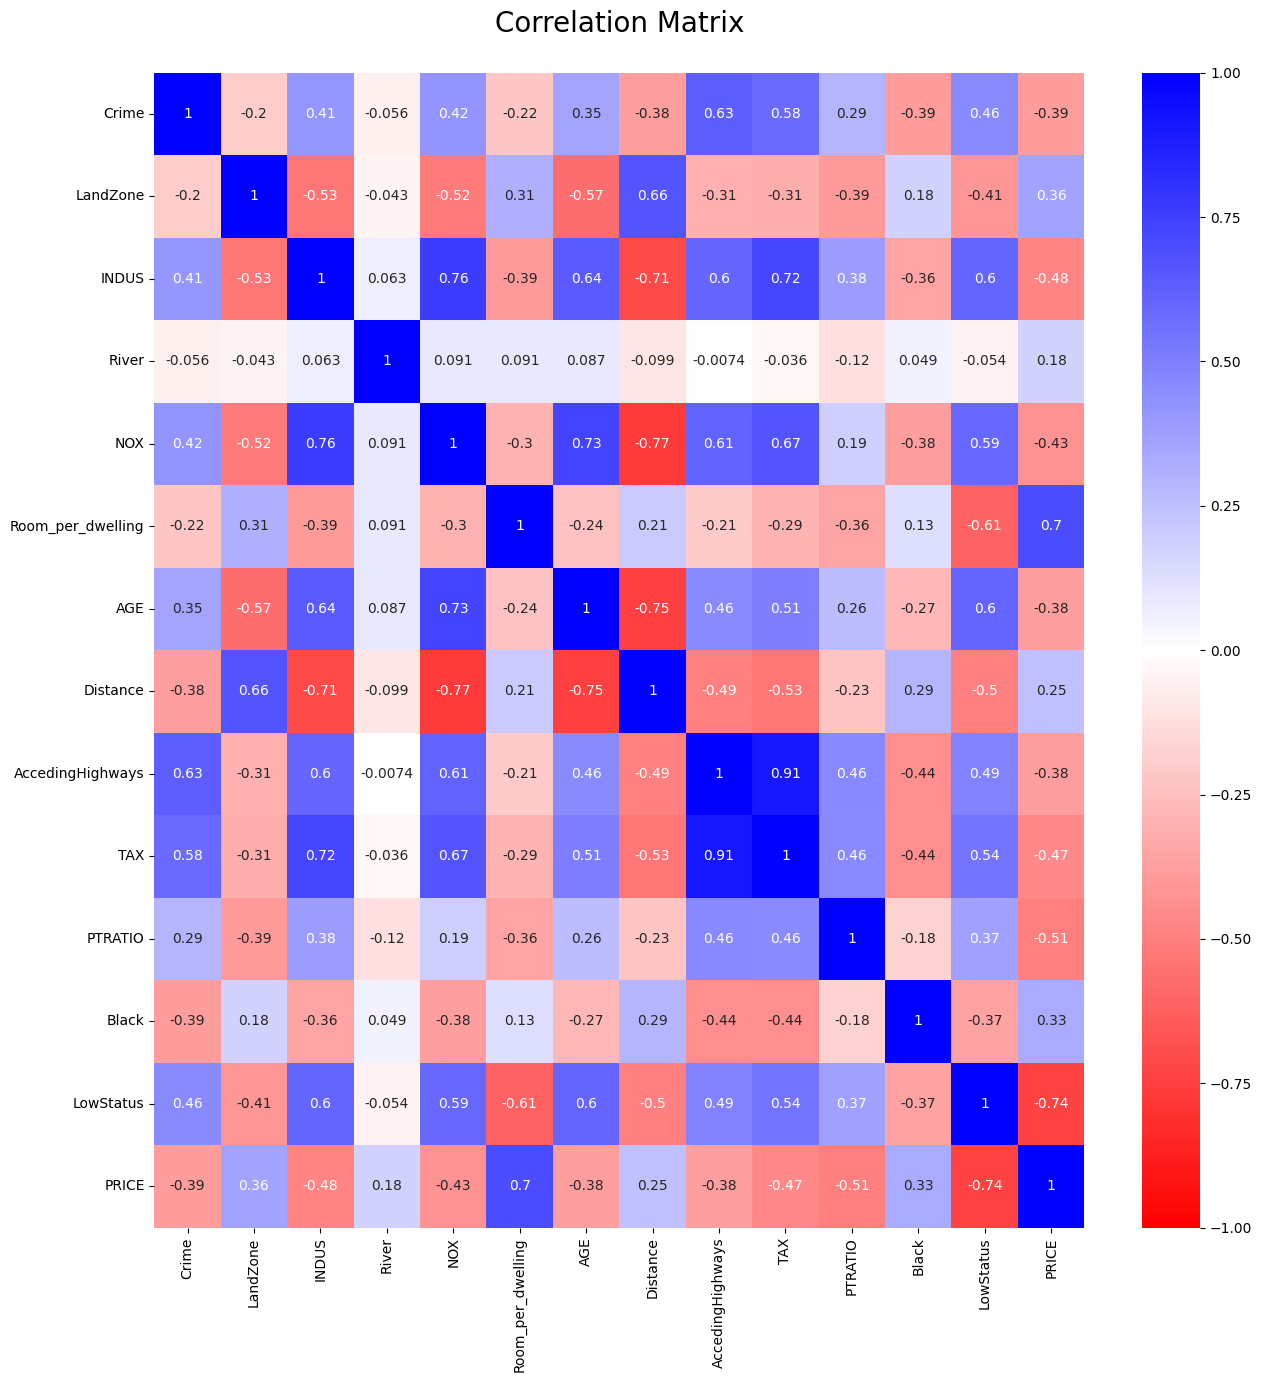

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,cmap='bwr_r')
plt.title("Correlation Matrix\n" , color="black" , fontsize=20)
plt.show()

Visualizing the presence of No Null values.

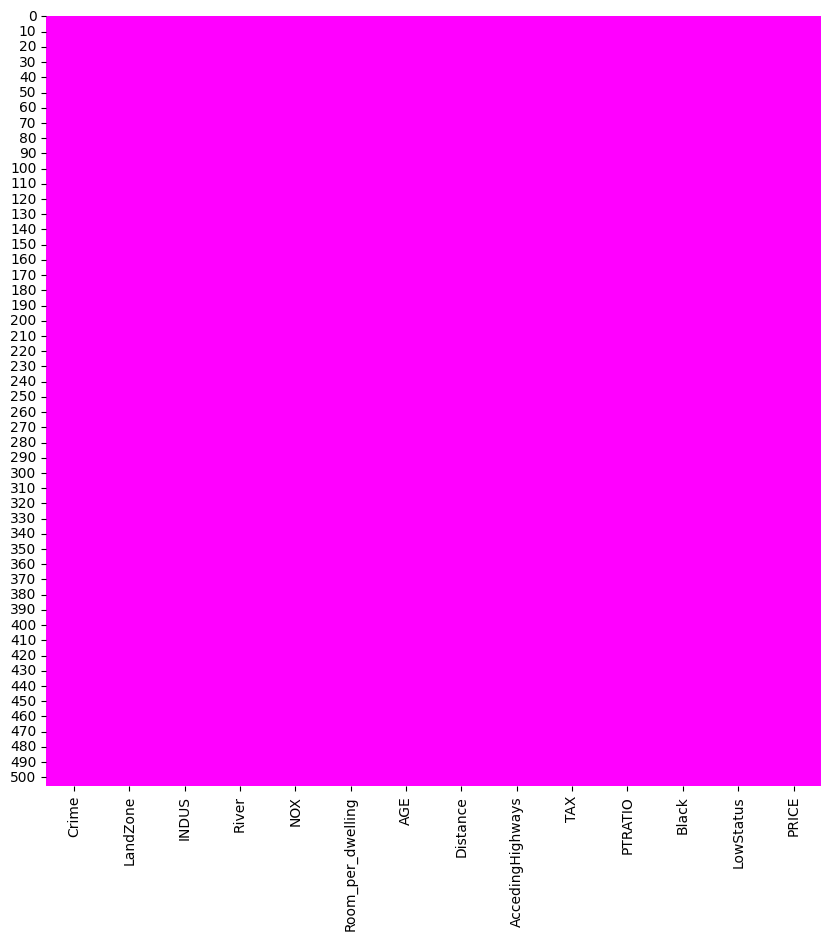

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap="cool_r")
plt.show()

Plotting between some features for Visaulization and finding the relation between them.

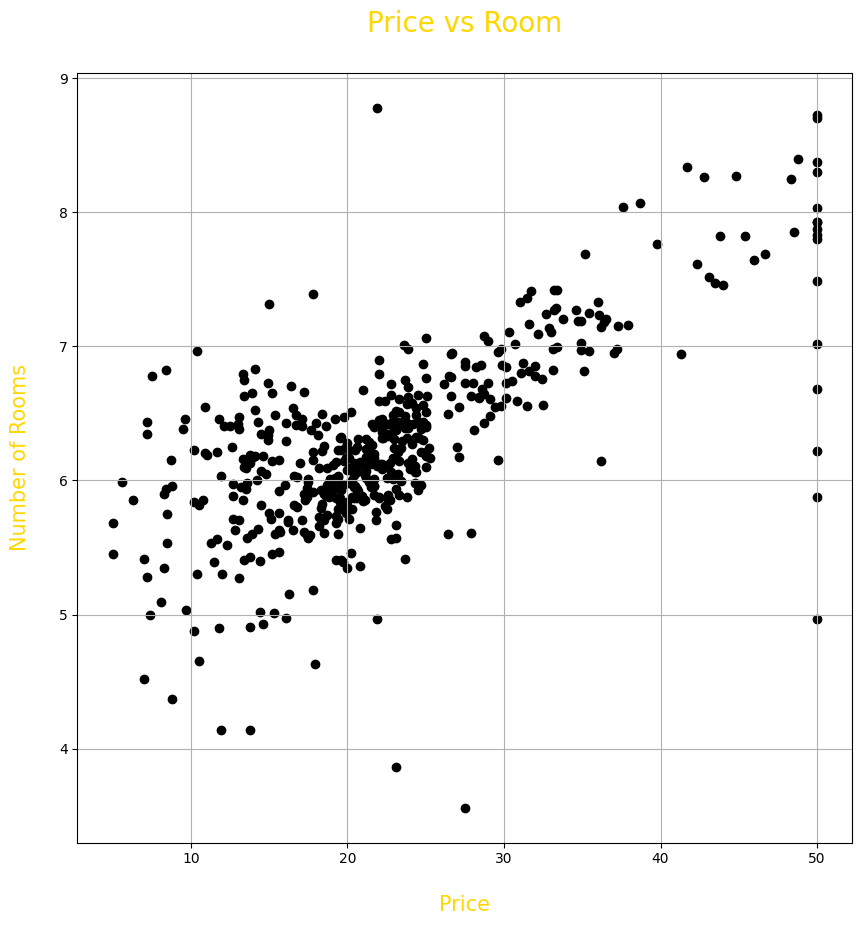

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(data['PRICE'],data['Room_per_dwelling'] ,color='black')
plt.title("Price vs Room\n",color="gold",fontsize=20)
plt.xlabel('\nPrice',fontsize=15,color="gold")
plt.ylabel('Number of Rooms\n',fontsize=15,color="gold")
plt.grid(True)
plt.show()

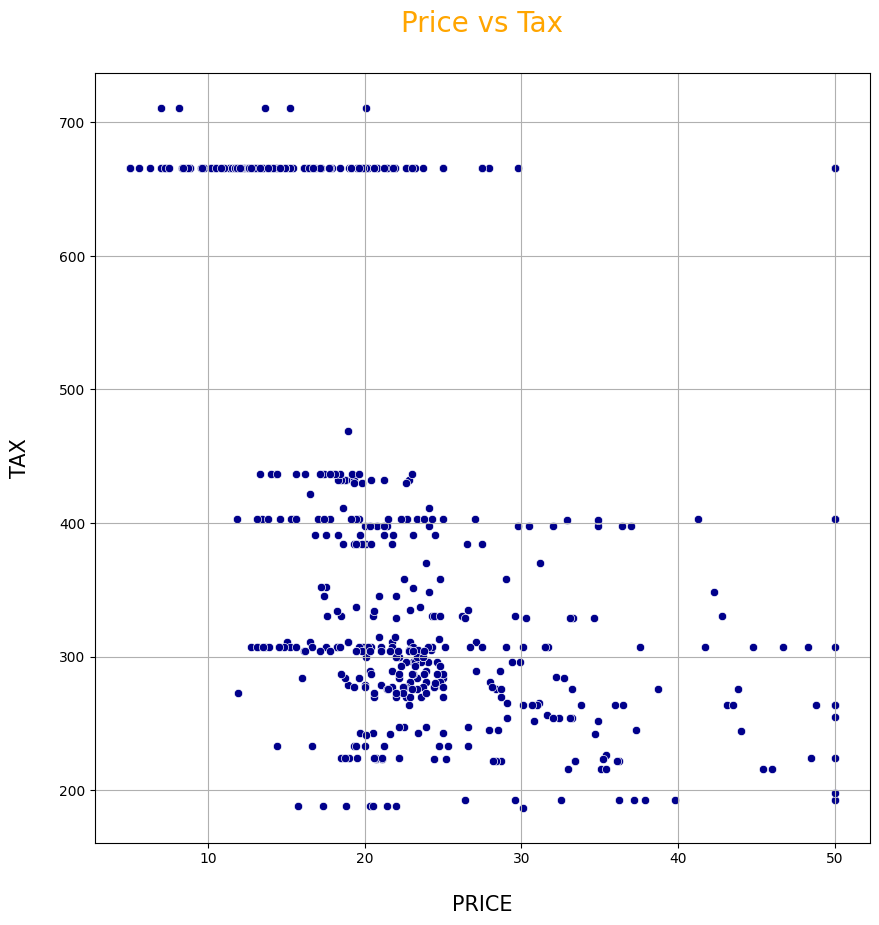

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PRICE",y="TAX",data=data,color="darkblue")
plt.xlabel("\nPRICE",fontsize=15,color="black")
plt.ylabel("TAX\n ",fontsize=15,color="black")
plt.title("Price vs Tax\n",fontsize=20,color="orange")
plt.grid(True)
plt.show()

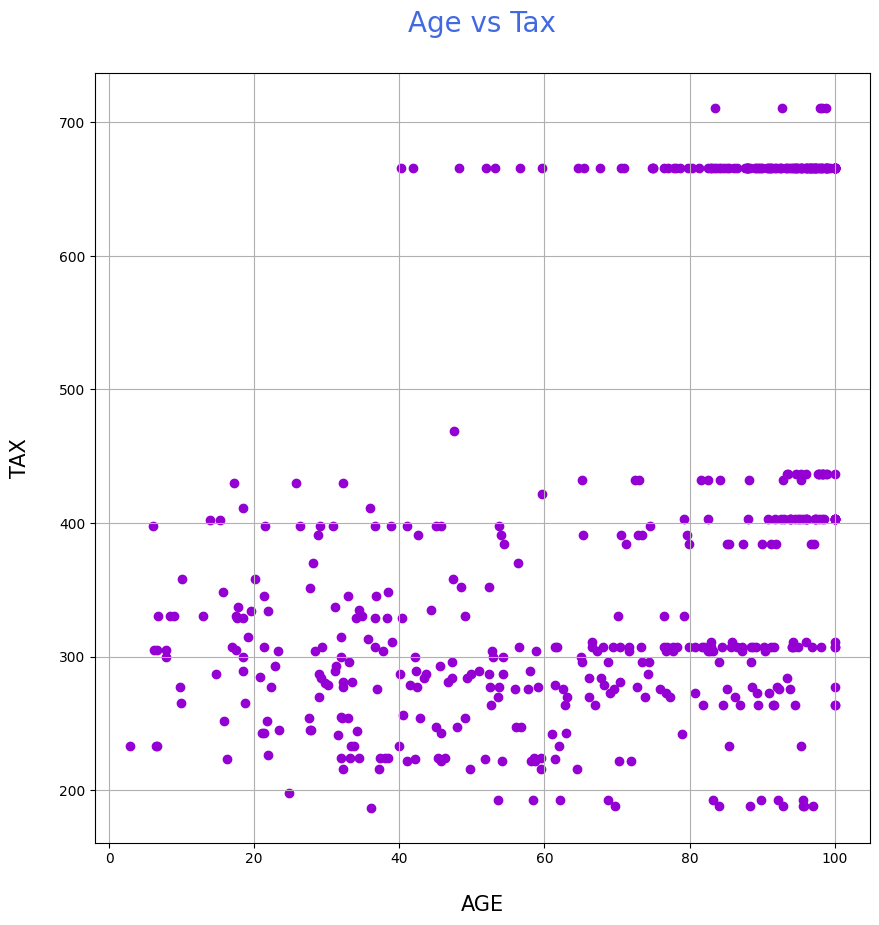

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['AGE'], y=data['TAX'],color="darkviolet")
plt.xlabel("\nAGE",fontsize=15,color="black")
plt.ylabel("TAX\n ",fontsize=15,color="black")
plt.title("Age vs Tax\n",fontsize=20,color="royalblue")
plt.grid(True)
plt.show()

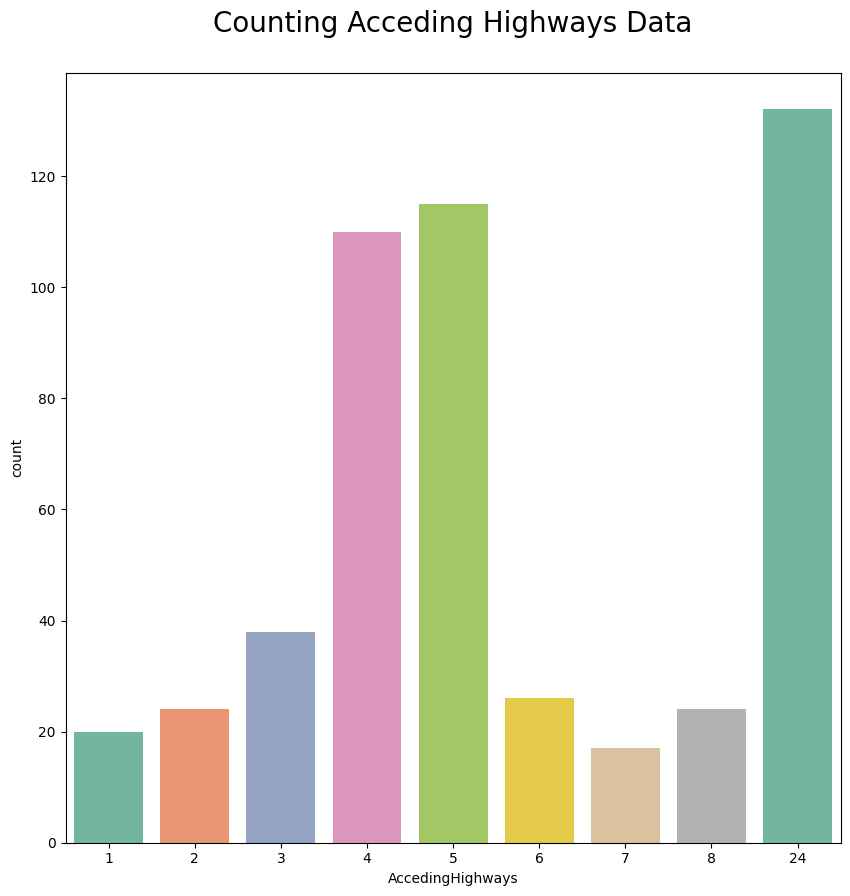

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x="AccedingHighways",data=data,palette = "Set2")
plt.title("Counting Acceding Highways Data\n",fontsize=20,color="Black")
plt.show()

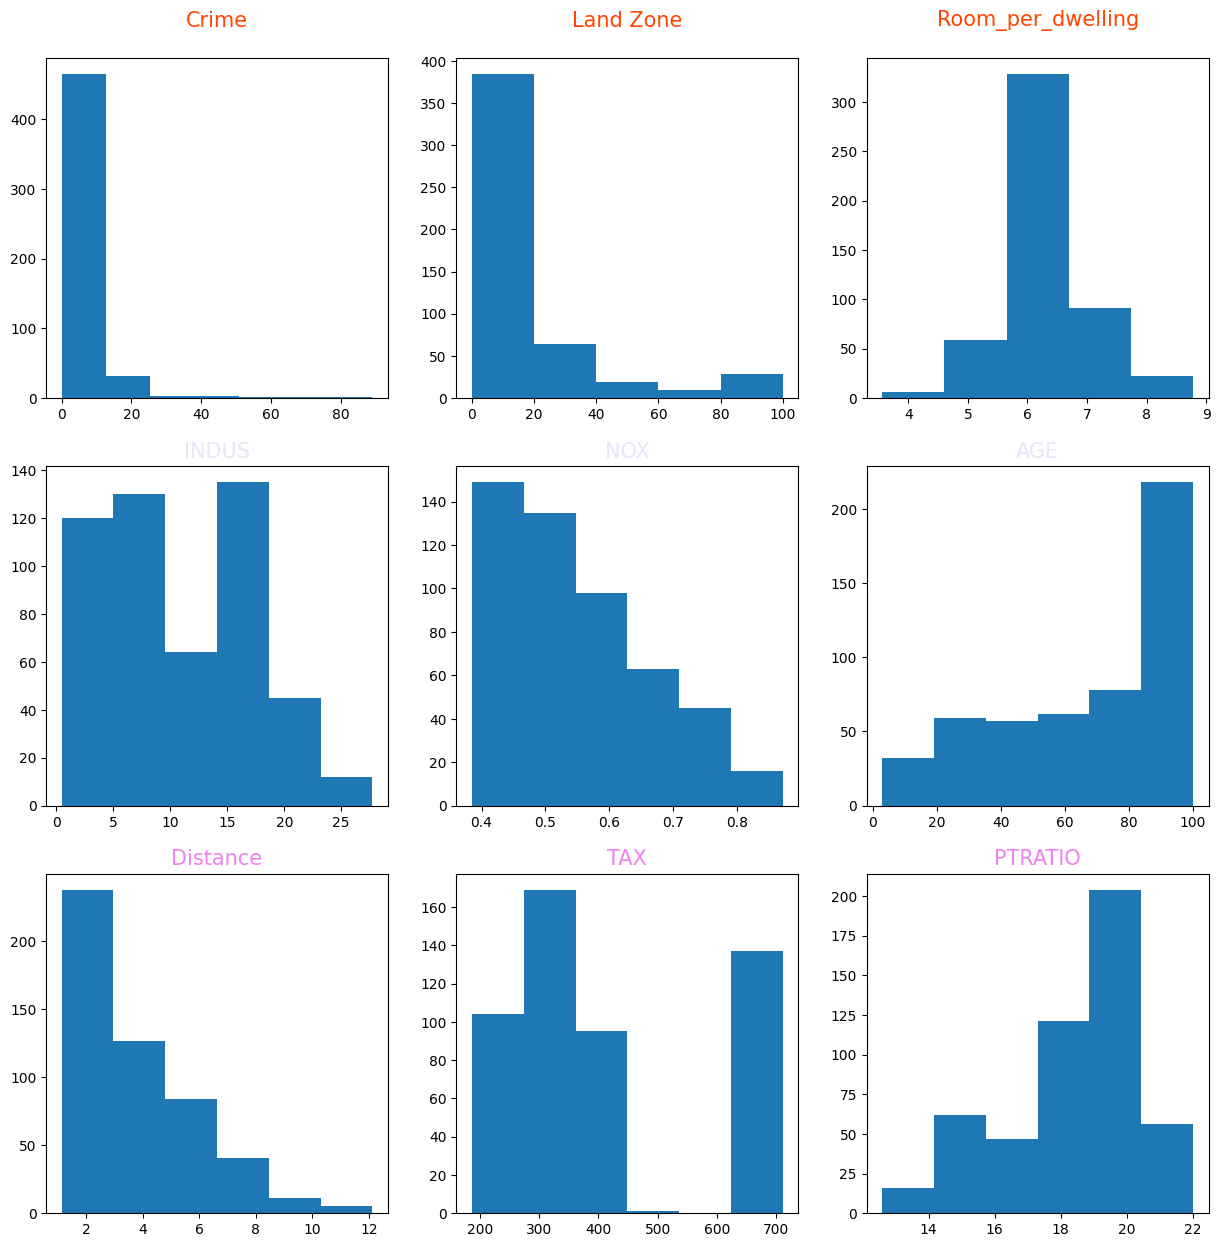

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
 

axes[0,0].set_title("Crime\n",fontsize=15,color="orangered")
axes[0,0].hist(data['Crime'], bins=7)
 
axes[0,1].set_title("Land Zone\n",fontsize=15,color="orangered")
axes[0,1].hist(data['LandZone'], bins=5);

axes[0,2].set_title("Room_per_dwelling\n",fontsize=15,color="orangered")
axes[0,2].hist(data['Room_per_dwelling'], bins=5);
 
axes[1,0].set_title("INDUS",color="lavender",fontsize=15)
axes[1,0].hist(data['INDUS'], bins=6);
 
axes[1,1].set_title("NOX",fontsize=15,color="lavender")
axes[1,1].hist(data['NOX'], bins=6);

axes[1,2].set_title("AGE",fontsize=15,color="lavender")
axes[1,2].hist(data['AGE'], bins=6);

axes[2,0].set_title("Distance",fontsize=15,color="violet")
axes[2,0].hist(data['Distance'], bins=6);

axes[2,1].set_title("TAX",fontsize=15,color="violet")
axes[2,1].hist(data['TAX'], bins=6);

axes[2,2].set_title("PTRATIO",fontsize=15,color="violet")
axes[2,2].hist(data['PTRATIO'], bins=6);

Some Regression plots for the features.

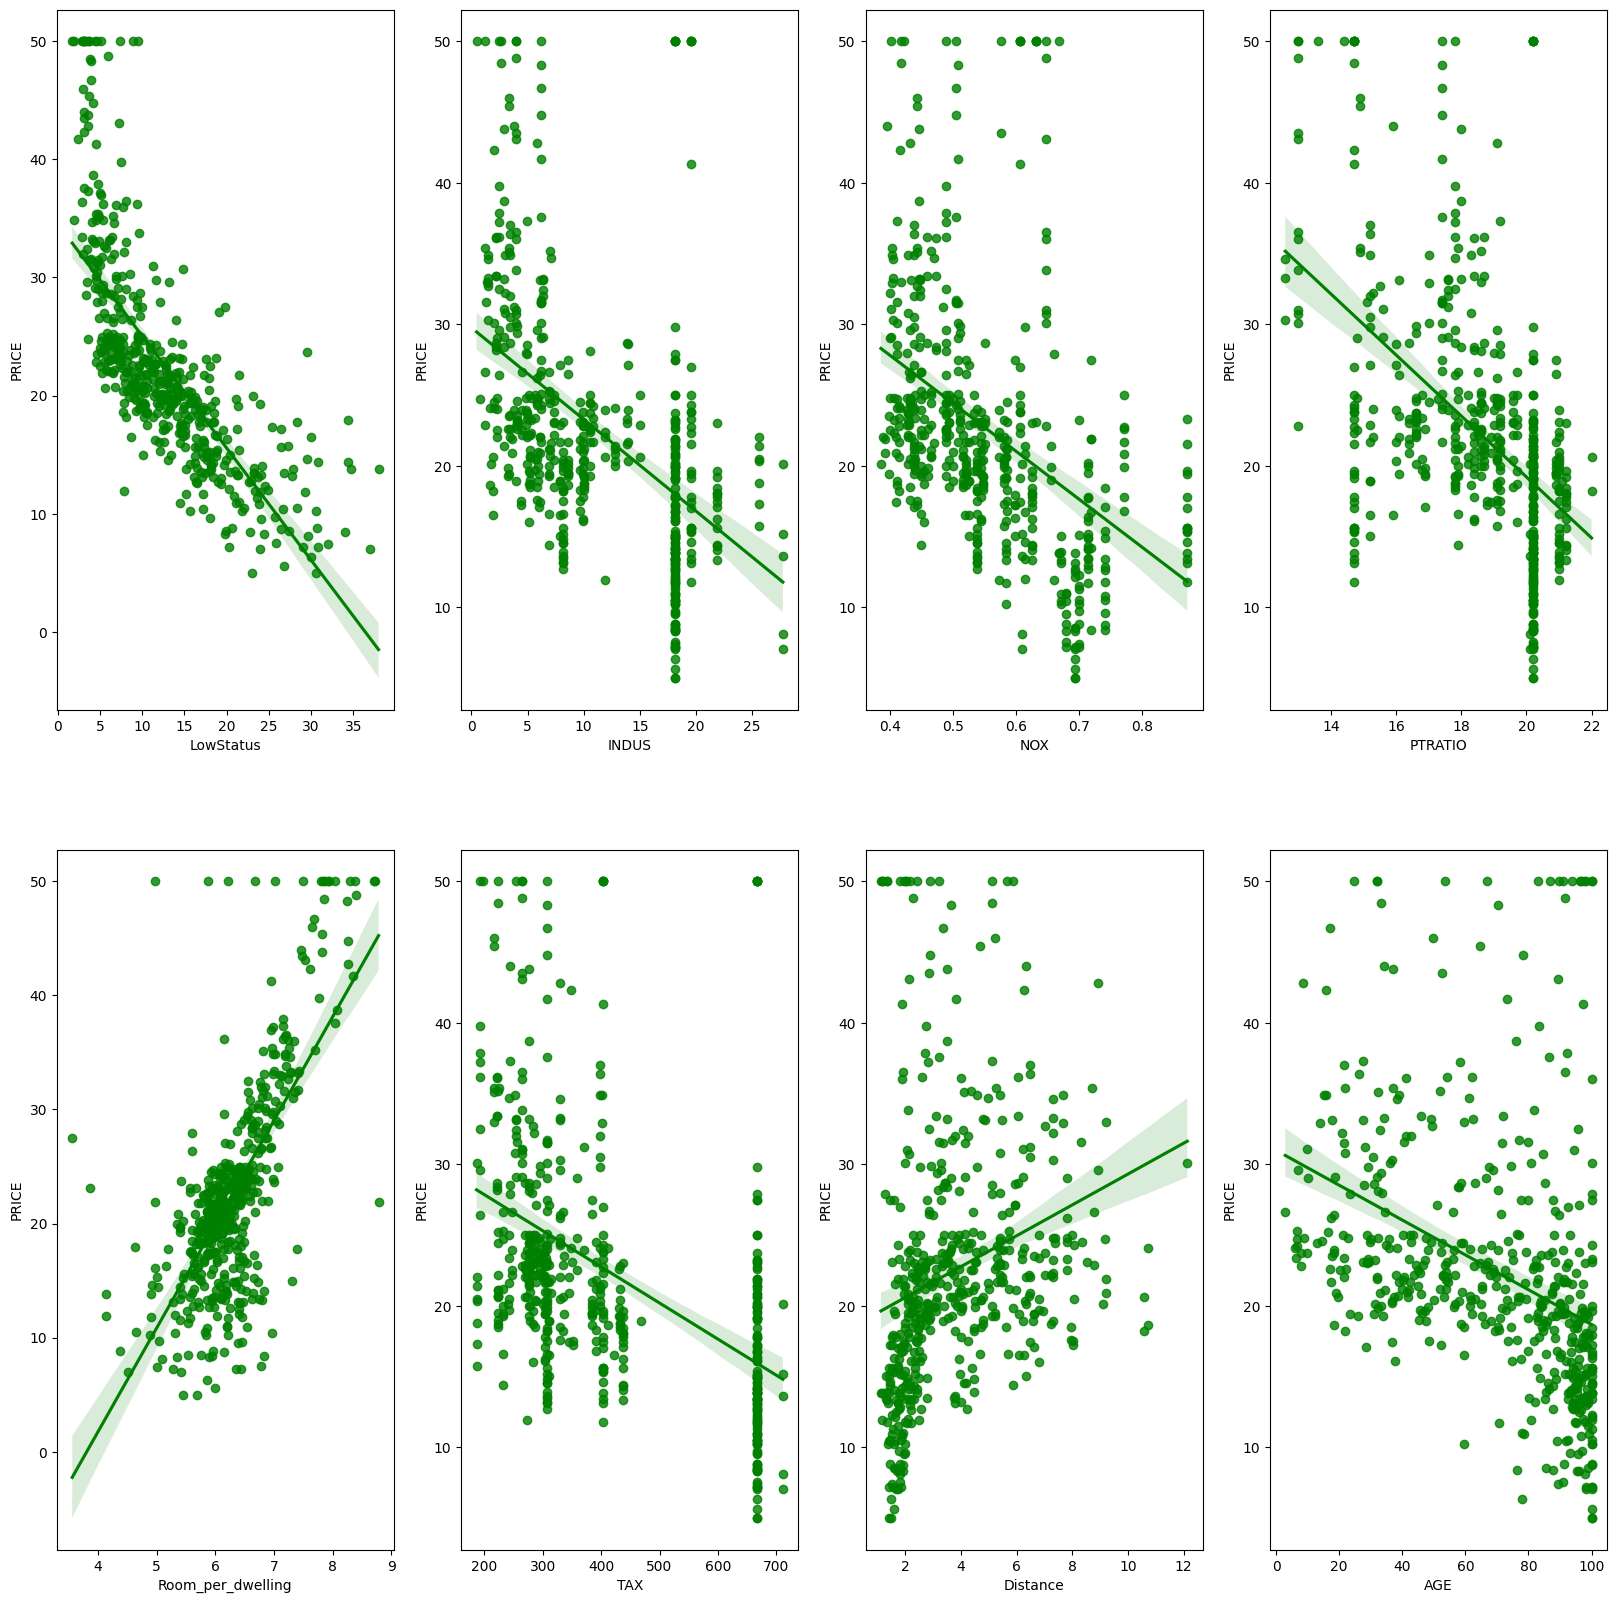

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
columns=["LowStatus","INDUS","NOX","PTRATIO","Room_per_dwelling","TAX","Distance","AGE"]
for col,ax in zip(columns,axes.flat):
    sns.regplot(x=data[col],y=data["PRICE"],ax=ax,color="green")

plt.show()

<Figure size 1000x1000 with 0 Axes>

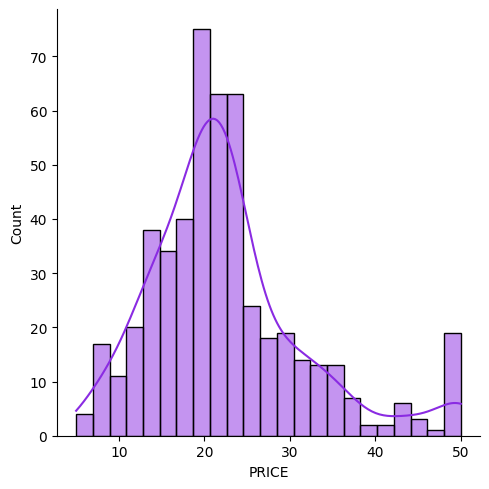

In [19]:
plt.figure(figsize=(10,10))
sns.displot(data=data, x="PRICE",kde=True,color="blueviolet")

plt.show()

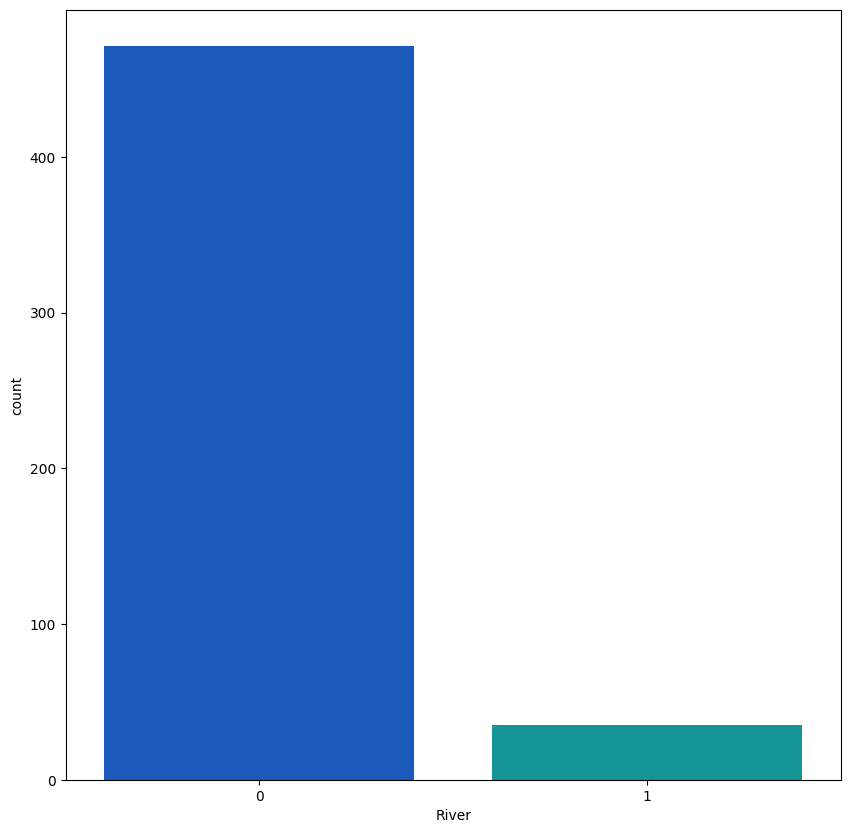

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x="River",data=data,palette='winter')
plt.show()

# Creating a pairplot for exploratory data analysis(EDA).

<Figure size 1500x1500 with 0 Axes>

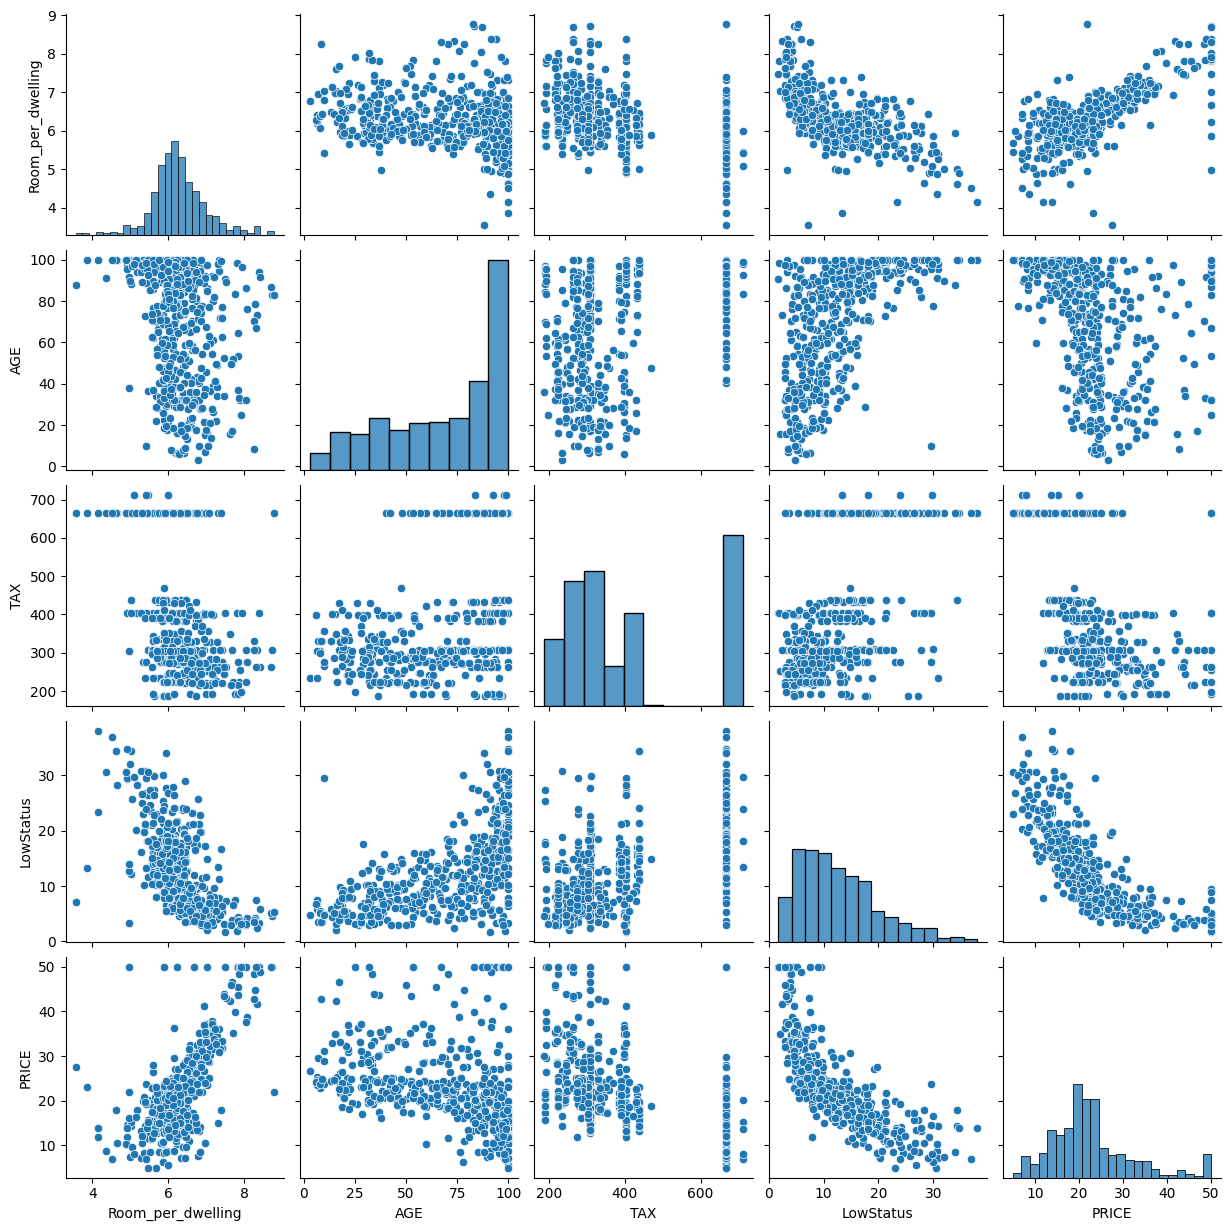

In [21]:
plt.figure(figsize=(15,15))
cols = ['Room_per_dwelling', 'AGE', 'TAX', 'LowStatus', 'PRICE'] 
sns.pairplot(data[cols])

plt.show()

Analysis of "AGE" Feature by changing it to Catergorical Data and using violin plots.

In [22]:
def get_age_category(x):
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very Old'
data['AGE_Category'] = data.AGE.apply(get_age_category)

In [23]:
data.head(5)

,Crime,LandZone,INDUS,River,NOX,Room_per_dwelling,AGE,Distance,AccedingHighways,TAX,PTRATIO,Black,LowStatus,PRICE,AGE_Category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,New
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Old


In [24]:
data.groupby('AGE_Category').size()

age_category=pd.DataFrame({"Category":["New","Old","Very Old"],"Numbers":[147,149,210]})
age_category

,Category,Numbers
0,New,147
1,Old,149
2,Very Old,210


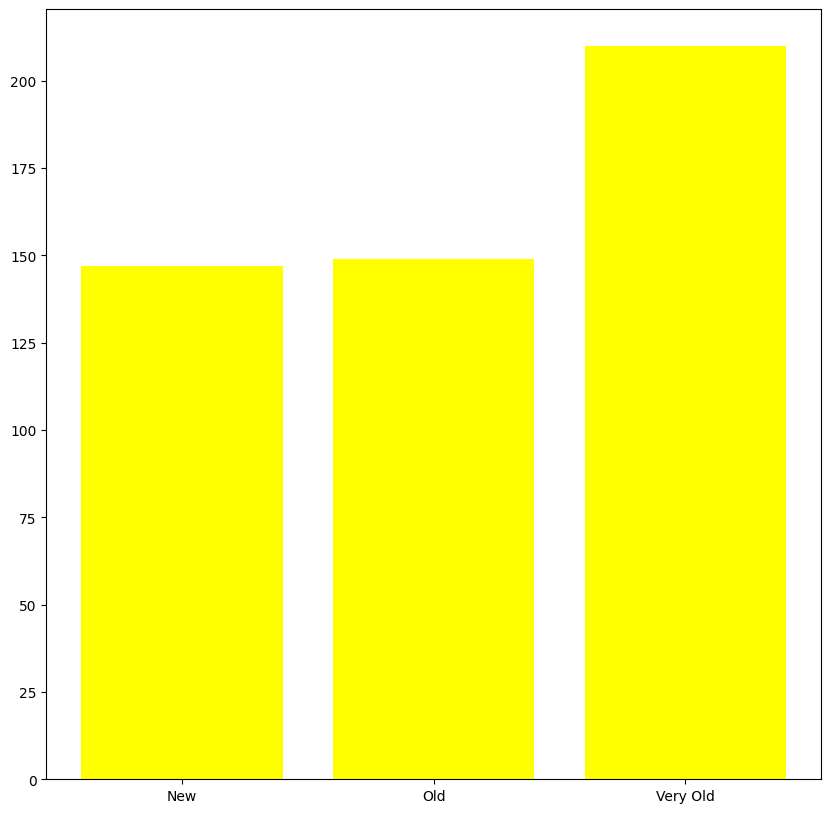

In [25]:
plt.figure(figsize=(10,10))
plt.bar(age_category["Category"],age_category["Numbers"],color="yellow")
plt.show()

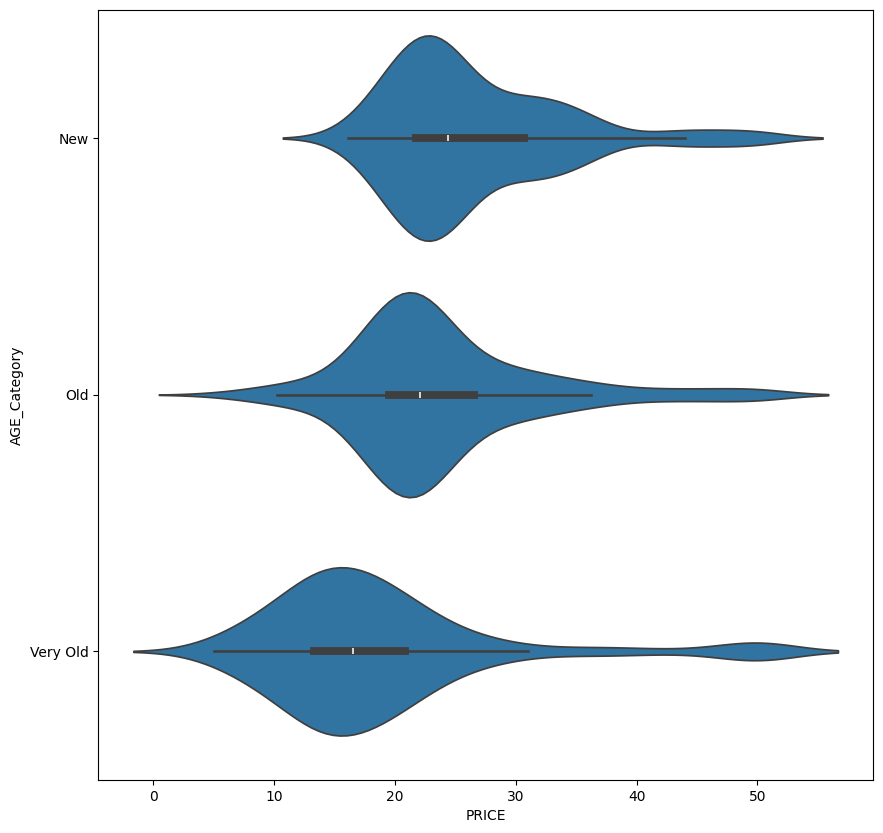

In [26]:
plt.figure(figsize=(10,10))
sns.violinplot(x='PRICE', y='AGE_Category', data=data,order=['New', 'Old', 'Very Old'])

plt.show()

In [27]:
data.head(5)

,Crime,LandZone,INDUS,River,NOX,Room_per_dwelling,AGE,Distance,AccedingHighways,TAX,PTRATIO,Black,LowStatus,PRICE,AGE_Category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,New
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Old


Differentiating the data to Label and Features 

In [28]:
y=data["PRICE"]
X=data.drop(["PRICE","AGE_Category"],axis=1)
X.head()

,Crime,LandZone,INDUS,River,NOX,Room_per_dwelling,AGE,Distance,AccedingHighways,TAX,PTRATIO,Black,LowStatus
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


Finding Mutual Information between the features.

In [29]:
mi_score = mutual_info_regression(X, y)
features_mi = list(zip(X.columns, mi_score))

# Ordenar la lista por puntajes de Mutual Information (de mayor a menor)
sorted_features_mi = sorted(features_mi, key=lambda x: x[1], reverse=True)

# Mostrar las características y puntajes ordenados
for feature, score in sorted_features_mi:
    print(f"{feature}=======> {score}")

LowStatus=======> 0.6651163261411357
Room_per_dwelling=======> 0.5293806271808781
NOX=======> 0.46336804046736324
INDUS=======> 0.4608257595398122
PTRATIO=======> 0.43386600162346545
TAX=======> 0.36975156468769255
Crime=======> 0.33994304277441145
AGE=======> 0.31080583619651847
Distance=======> 0.2975875534292389
AccedingHighways=======> 0.21603993180907288
LandZone=======> 0.18444921725120667
Black=======> 0.16440398534182155
River=======> 0.026146496194903168


# Feature Engineering

In [30]:
def Engineerda(data):
    data["Rooms_per_LandZone"] = data.groupby("LandZone")["Room_per_dwelling"].transform("mean")
    
    #data["PTRATIO_lowStatus"] = data.groupby("PTRATIO")["LowStatus"].transform("mean")
    
    #data["Age_lowStatus"] = data.groupby("LowStatus")["AGE"].transform("mean")
    
    return data

In [31]:
df=Engineerda(data)

In [32]:
tographs=df.columns

# Visualizing and Using Boxplots for Outlier Detection.

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: Crime, dtype: float64
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: LandZone, dtype: float64
count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64
count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: River, dtype: float64
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64
count    506.000000
mean       6.284634
std        0.702617

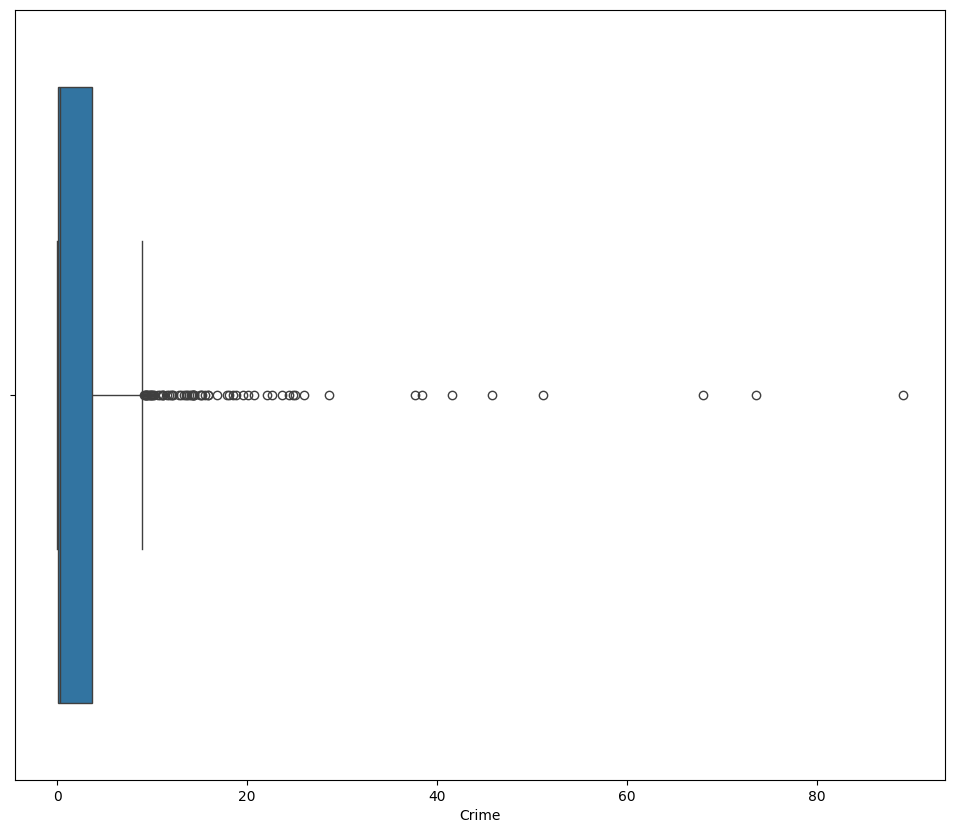

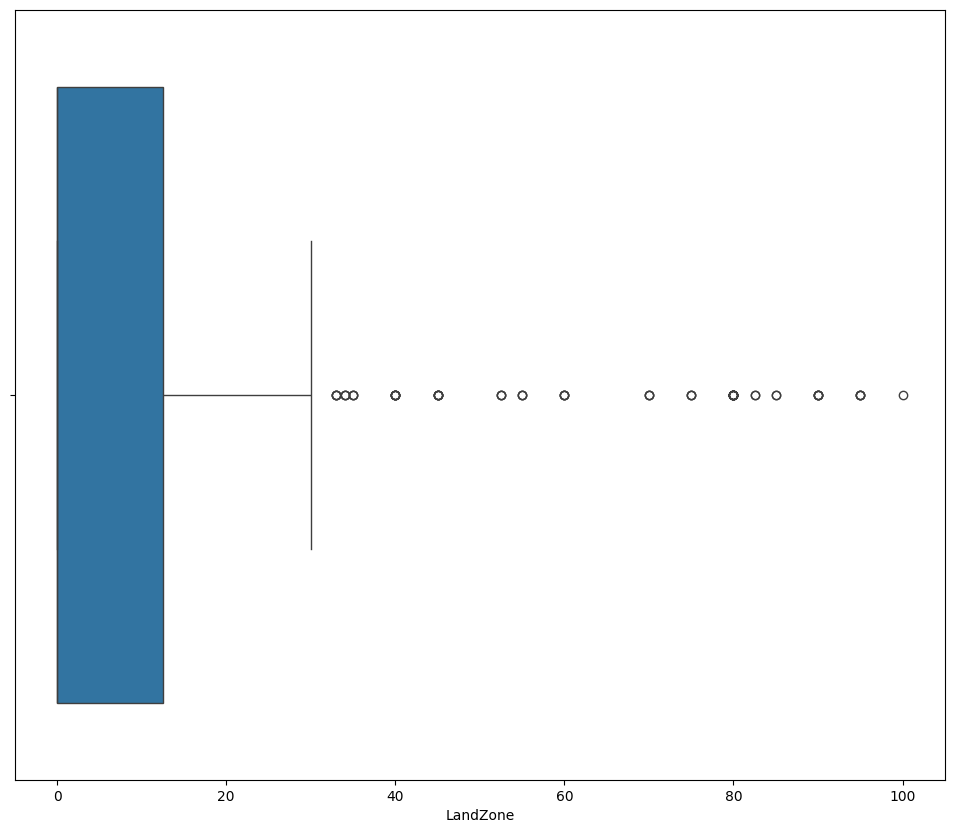

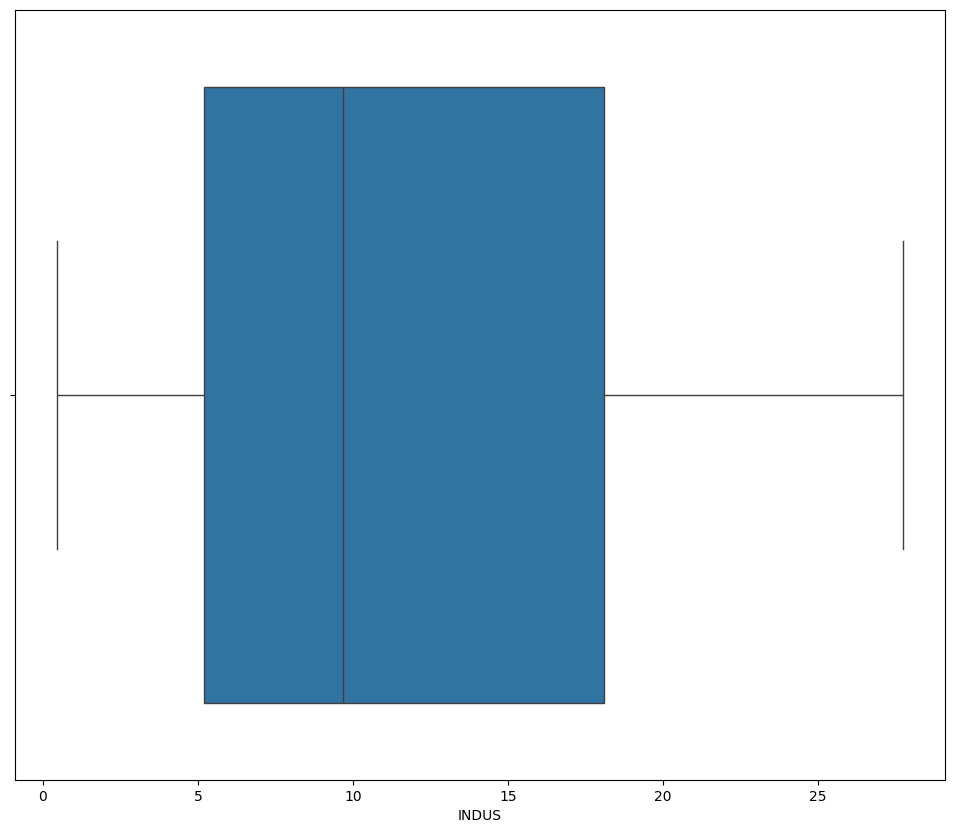

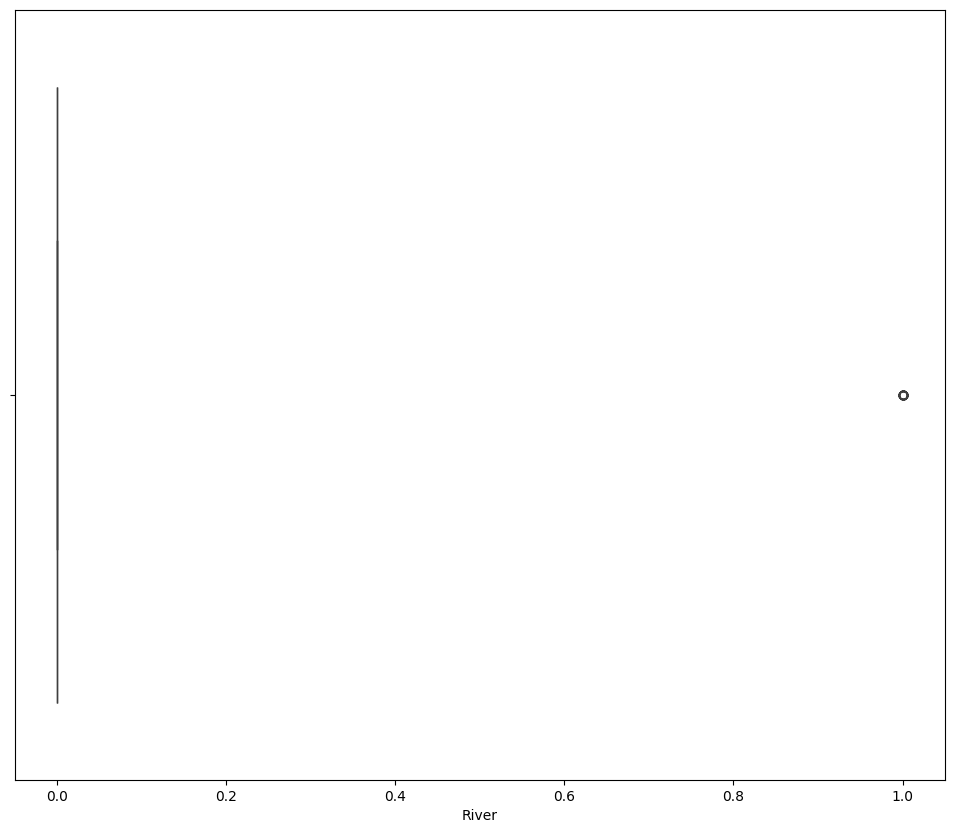

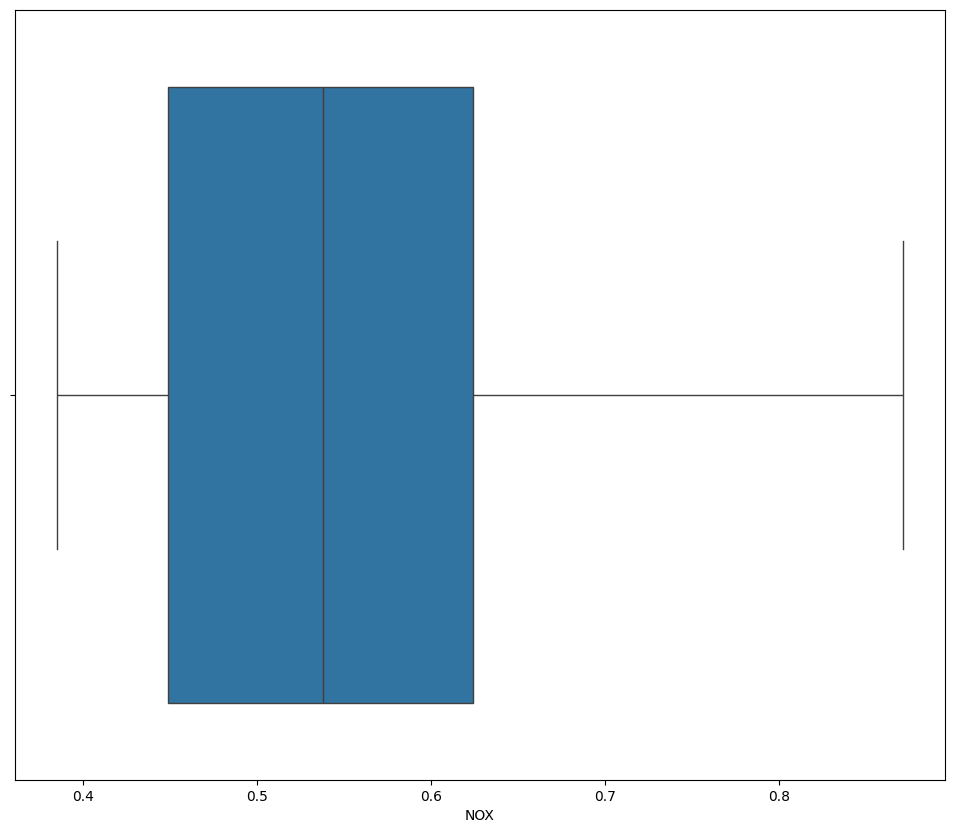

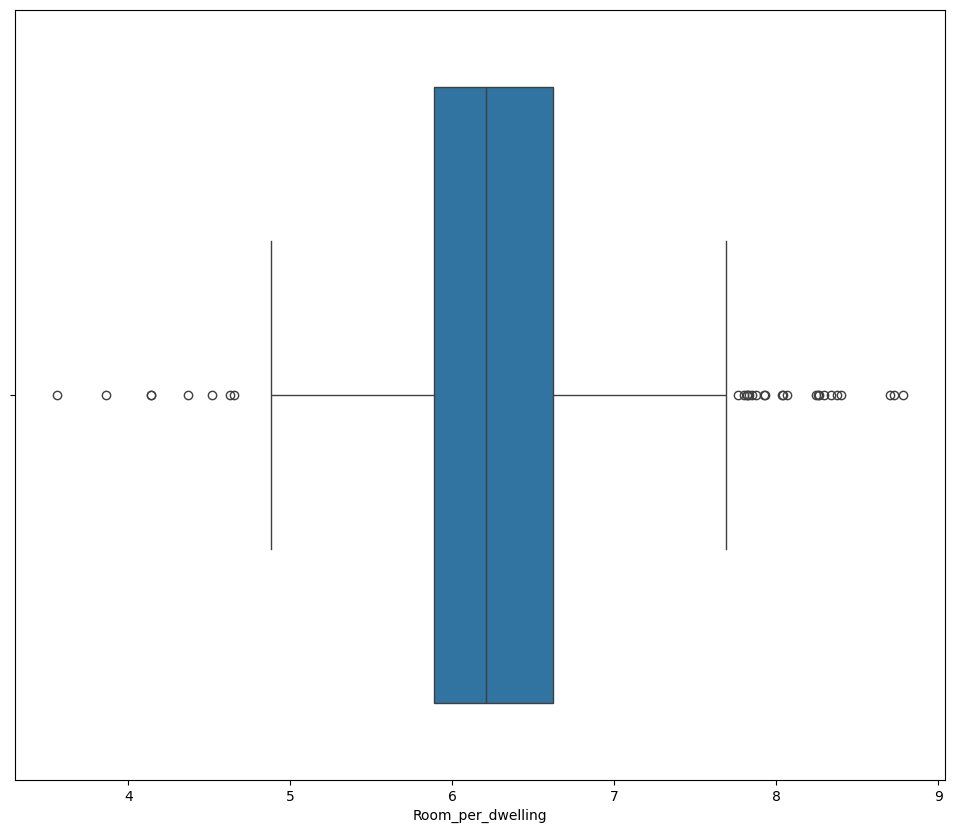

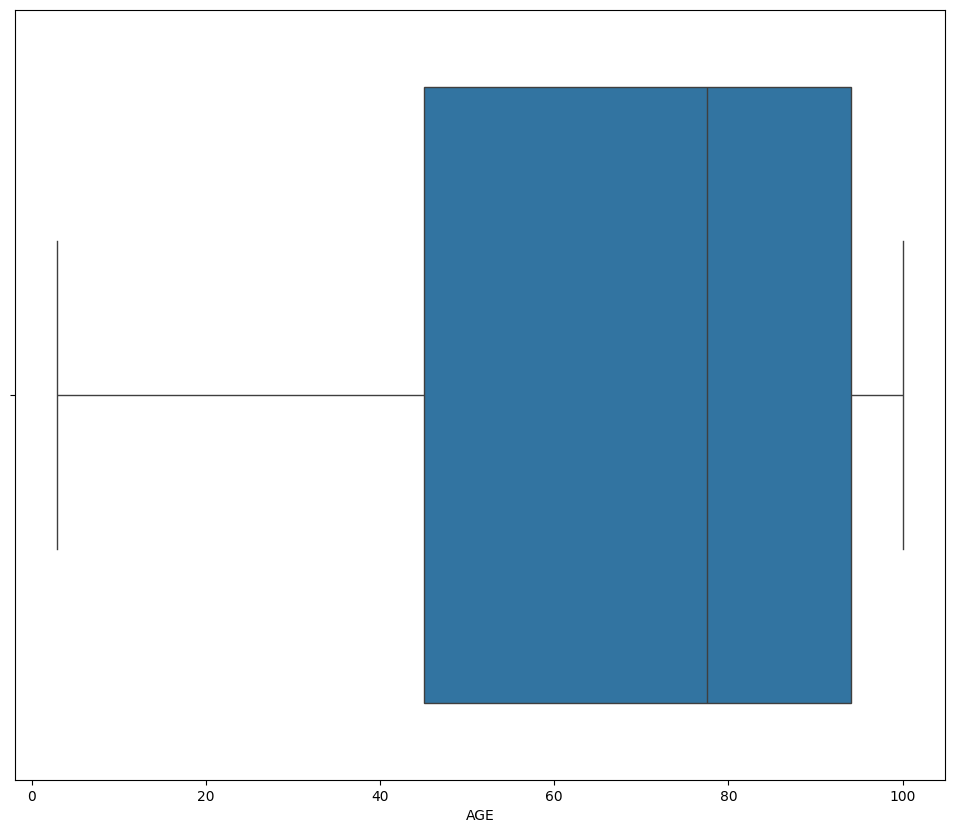

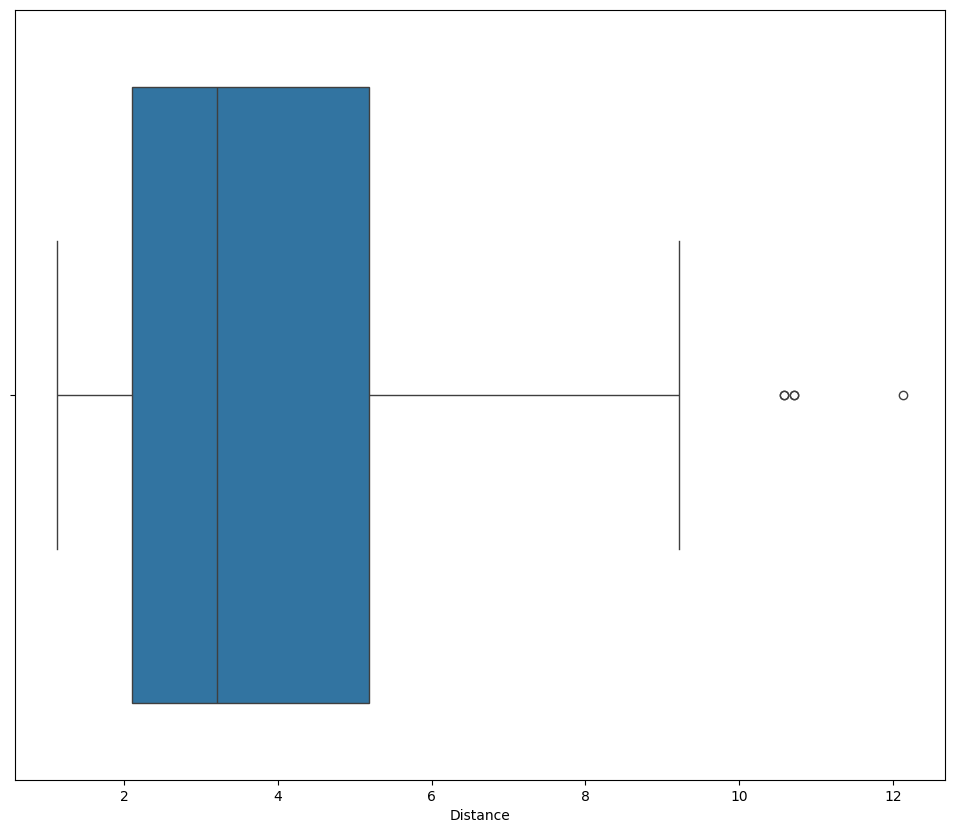

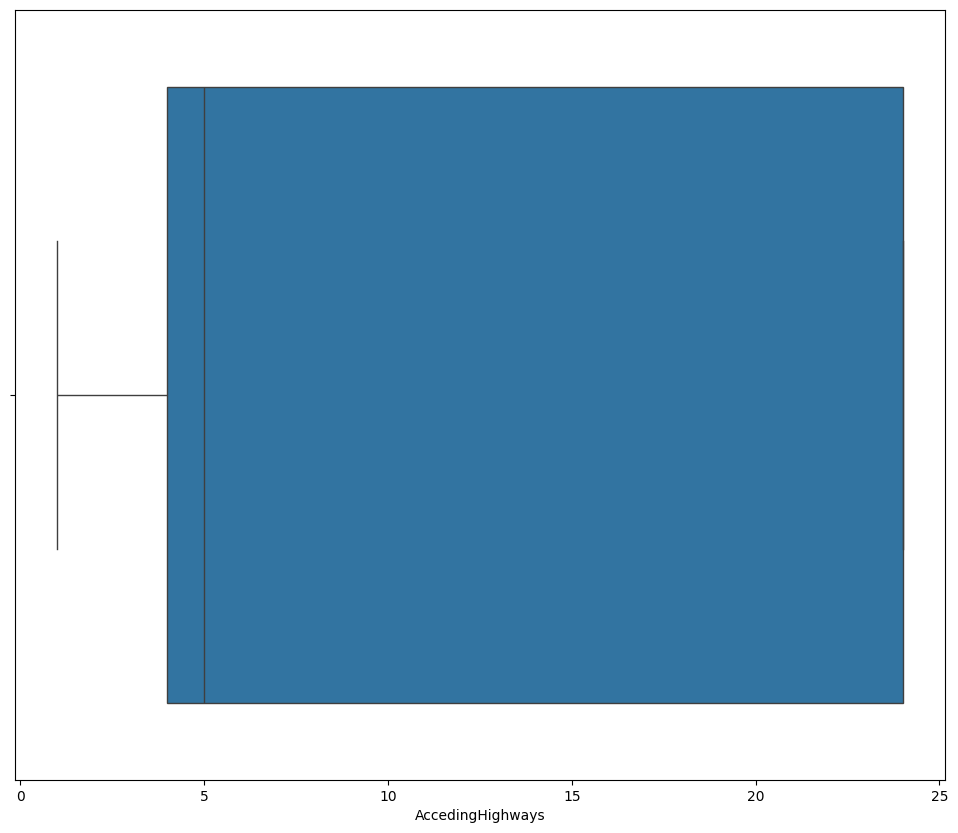

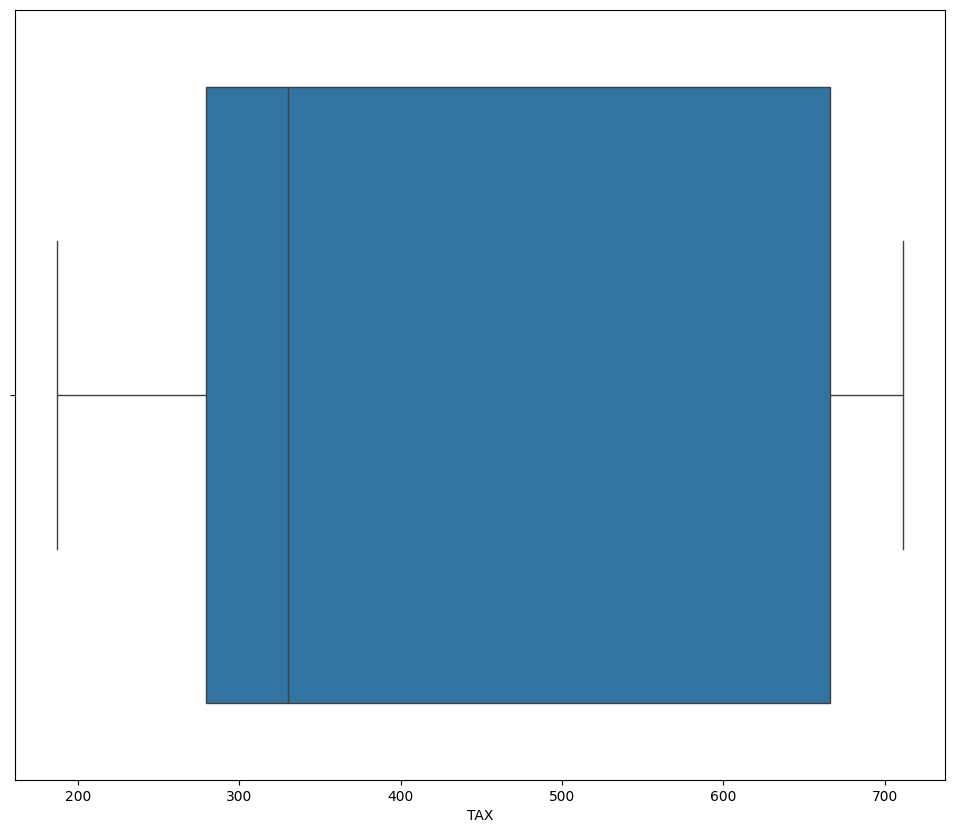

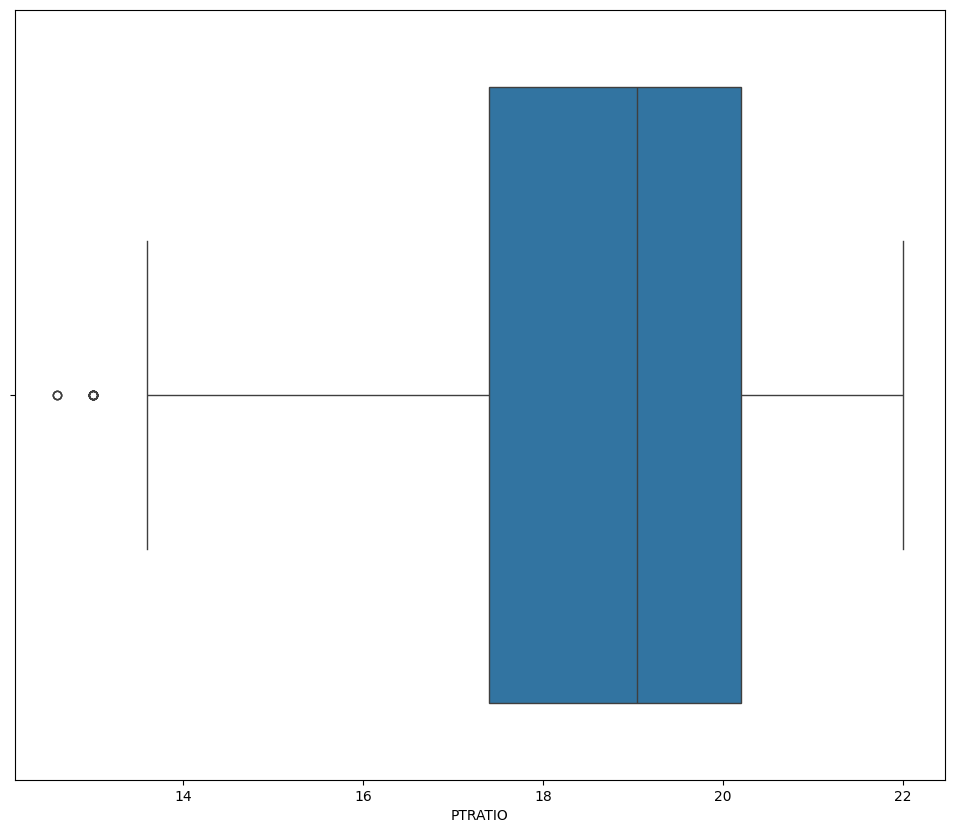

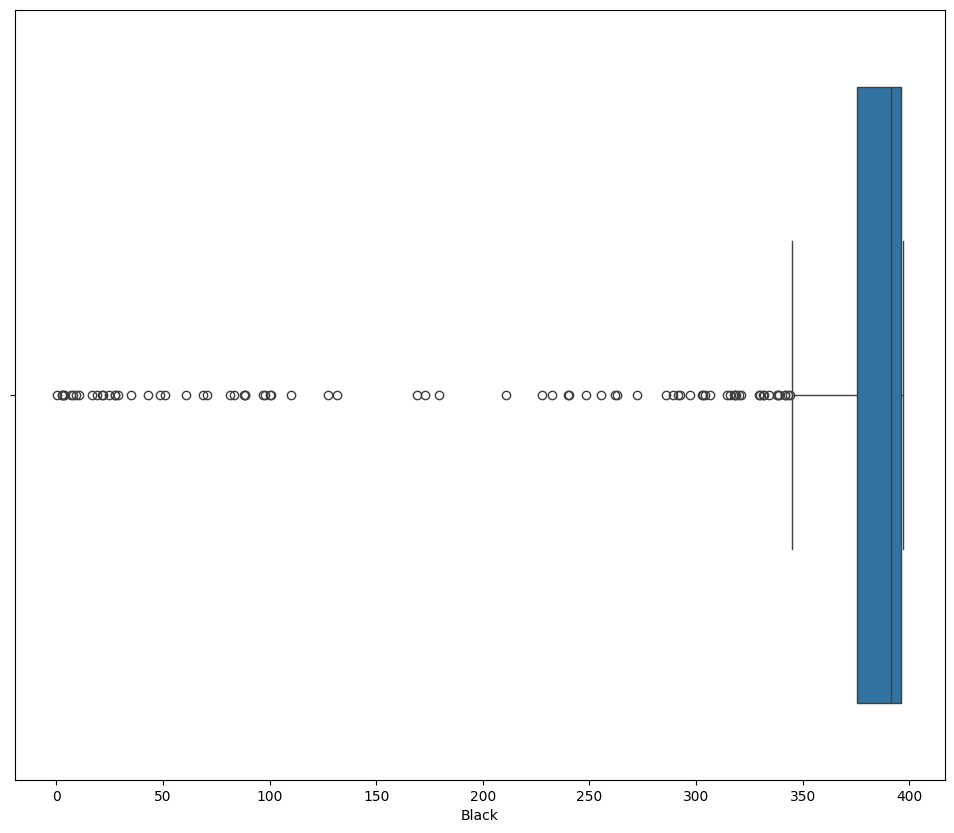

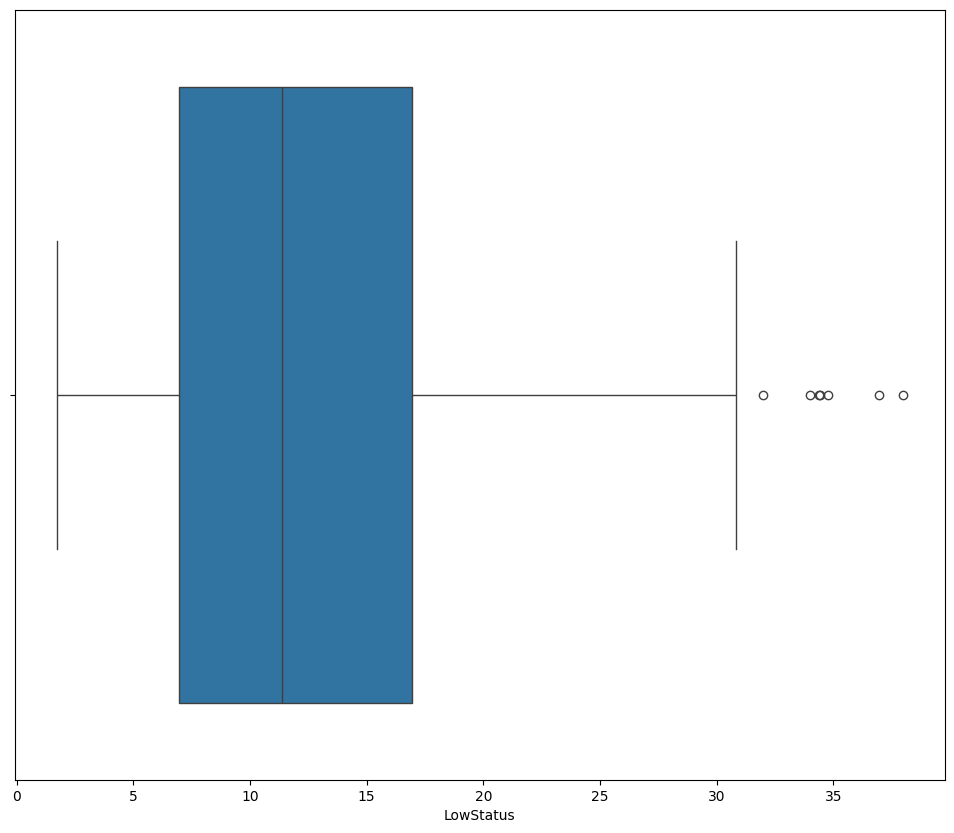

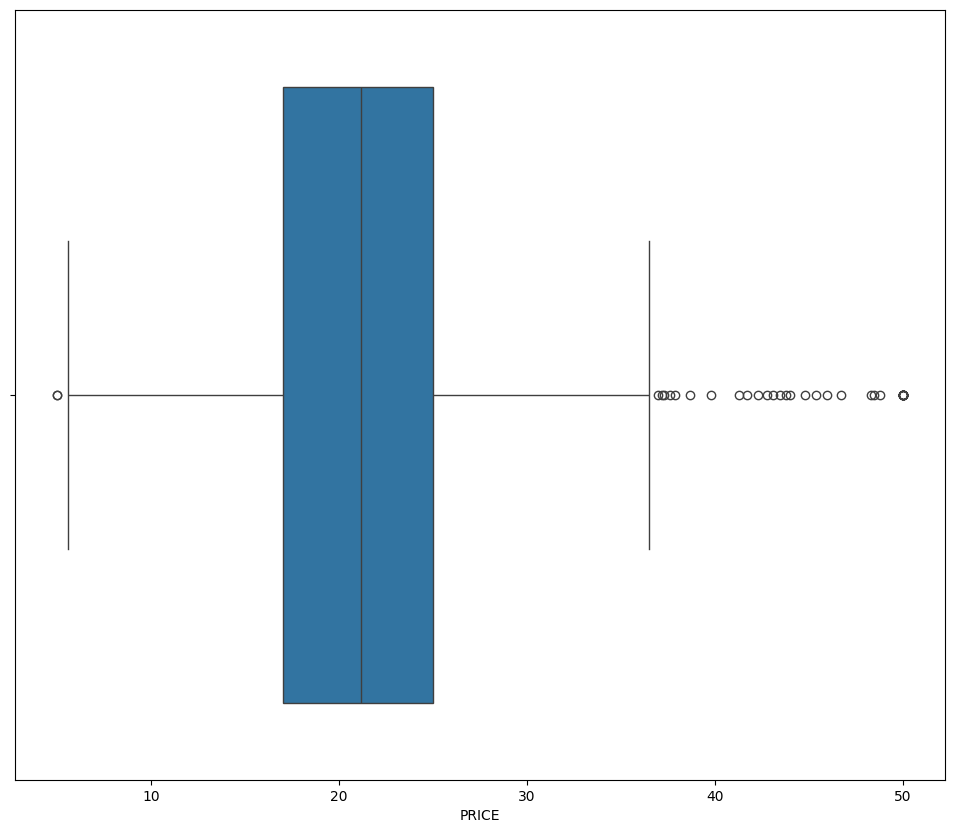

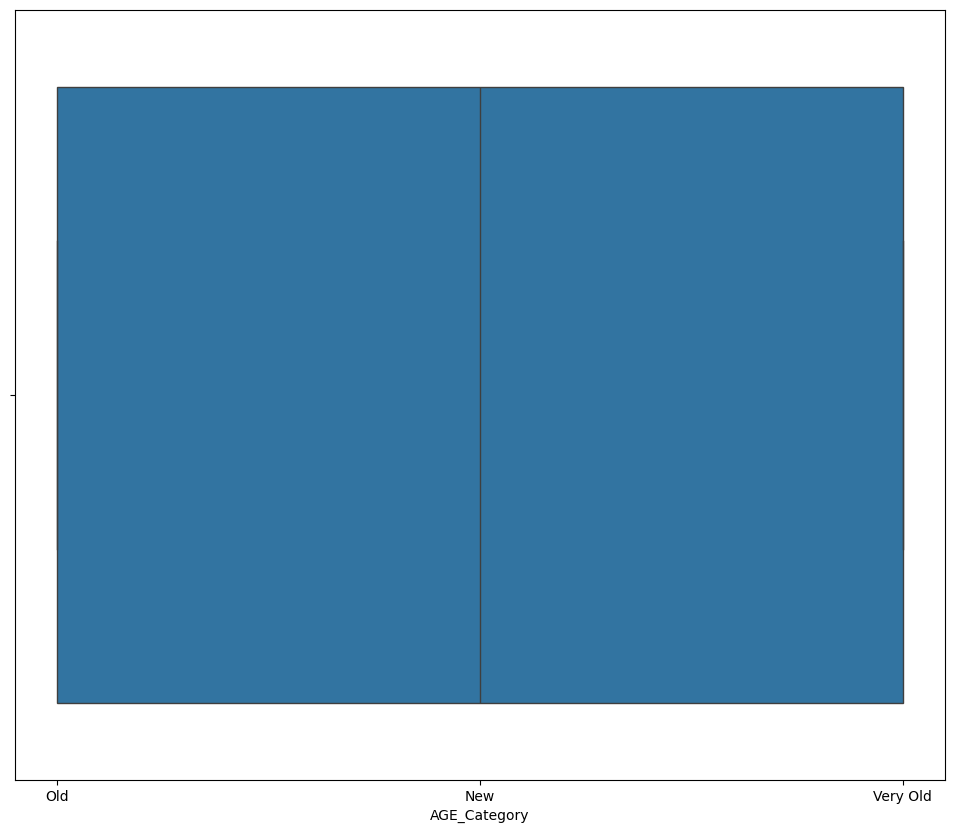

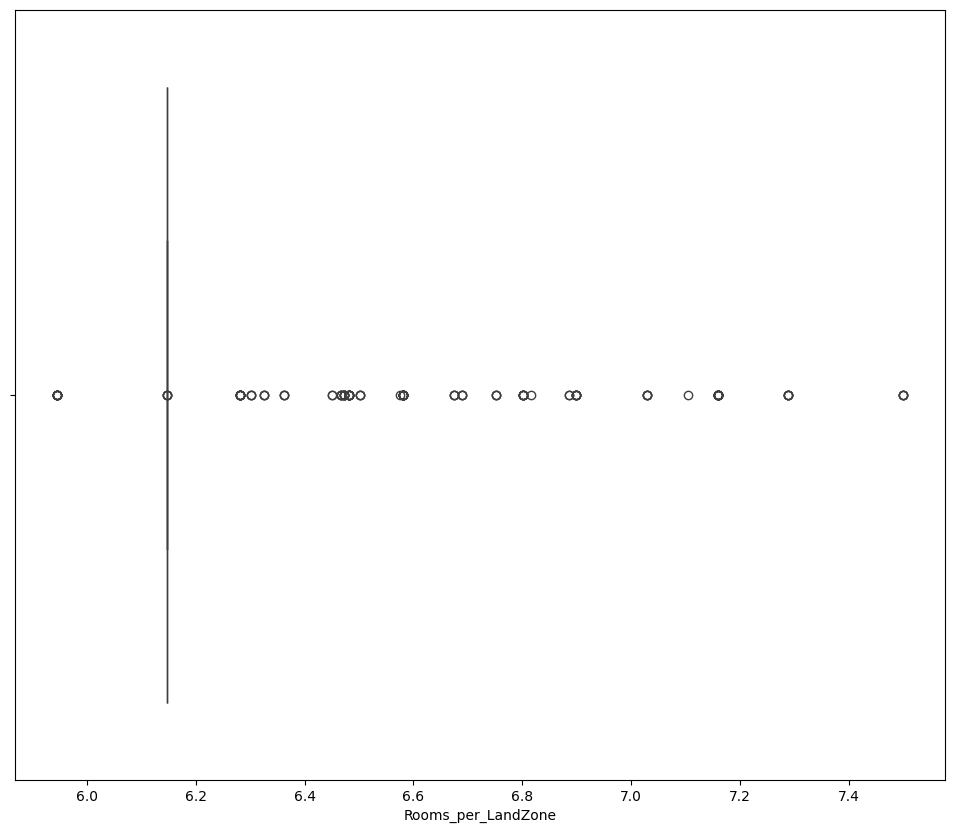

In [33]:
for columns in tographs:
    fig, axs = plt.subplots(1, figsize=(12, 10))
    sns.boxplot(x=data[columns])
    print(df[columns].describe())

In [34]:
datas = df.copy()


Function for Outlier Detection.

In [35]:
def outli(datas):
    
    media=datas["Crime"].mean()
    max=datas["Crime"].max()
    datas["Crime"]=datas["Crime"].replace(max,media)
    media=datas["Crime"].mean()
    max=datas["Crime"].max()
    datas["Crime"]=datas["Crime"].replace(max,media)
    media=datas["Crime"].mean()
    max=datas["Crime"].max()
    datas["Crime"]=datas["Crime"].replace(max,media)
    media=datas["Crime"].mean()
    max=datas["Crime"].max()
    datas["Crime"]=datas["Crime"].replace(max,media)
    
    media = datas["Distance"].mean()
    max = datas["Distance"].max()
    datas["Distance"] = datas["Distance"].replace(max, media)
    media = datas["Distance"].mean()
    max = datas["Distance"].max()
    datas["Distance"] = datas["Distance"].replace(max, media)
    media = datas["Distance"].mean()
    max = datas["Distance"].max()
    datas["Distance"] = datas["Distance"].replace(max, media)
    
    media = datas["PTRATIO"].mean()
    min = datas["PTRATIO"].min()
    datas["PTRATIO"] = datas["PTRATIO"].replace(min, media)
    media = datas["PTRATIO"].mean()
    min = datas["PTRATIO"].min()
    datas["PTRATIO"] = datas["PTRATIO"].replace(min, media)

    media = datas["LowStatus"].mean()
    max = datas["LowStatus"].max()
    datas["LowStatus"] = datas["LowStatus"].replace(max, media)
    media = datas["LowStatus"].mean()
    max = datas["LowStatus"].max()
    datas["LowStatus"] = datas["LowStatus"].replace(max, media)
    media = datas["LowStatus"].mean()
    max = datas["LowStatus"].max()
    datas["LowStatus"] = datas["LowStatus"].replace(max, media)
    media = datas["LowStatus"].mean()
    max = datas["LowStatus"].max()
    datas["LowStatus"] = datas["LowStatus"].replace(max, media)
    media = datas["LowStatus"].mean()
    max = datas["LowStatus"].max()
    datas["LowStatus"] = datas["LowStatus"].replace(max, media)
    media = datas["LowStatus"].mean()
    max = datas["LowStatus"].max()
    datas["LowStatus"] = datas["LowStatus"].replace(max, media)
    return datas
    

In [36]:
data_1=outli(datas)

In [37]:
y=data_1["PRICE"]
X=data_1.drop(["PRICE","AGE_Category"],axis=1)

Splitting the Dataset with no Outliers to Training and Validation.

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split (X, y, test_size = 0.3, random_state = 0, shuffle=True)

In [39]:
y=df["PRICE"]
X=df.drop(["PRICE","AGE_Category"],axis=1)

Splitting the Original Dataset.

In [40]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split (X, y, test_size = 0.3, random_state = 0, shuffle=True)

# Training of Various Models and Their Metrics.

# 1. XGBoost Regressor Model.

In [41]:
model_1=XGBRegressor()

model_1.fit(X_train,y_train,
            eval_set=[(X_valid,y_valid)],
            verbose=False)

predictions=model_1.predict(X_valid)

mse=mean_squared_error(y_valid,predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_valid, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r21 = r2_score(y_valid, predictions)
print("R-squared (R2) Score:", r21)

Mean Squared Error (MSE): 17.786358461904218
Root Mean Squared Error (RMSE): 4.217387634769208
Mean Absolute Error (MAE): 2.6416483678315816
R-squared (R2) Score: 0.7863898239898675


# 2. Gradient Boosting Regressor Model.

In [42]:
model_2 = GradientBoostingRegressor()

model_2.fit(X_train1, y_train1)

predictions_2 = model_2.predict(X_valid1)

mse = mean_squared_error(y_valid1, predictions_2)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_valid1, predictions_2)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r22 = r2_score(y_valid1, predictions_2)
print("R-squared (R2) Score:", r22)

Mean Squared Error (MSE): 12.566752250675108
Root Mean Squared Error (RMSE): 3.544961530210886
Mean Absolute Error (MAE): 2.440515472301629
R-squared (R2) Score: 0.849076123935543


# 3. Random Forest Regressor

In [43]:
model_3=randomForestRegressor() 
model_3.fit(X_train1,y_train1)
prediction_3=model_3.predict(X_valid1)
# Calculate MSE
mse = mean_squared_error(y_valid1, prediction_3)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_valid1, prediction_3)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r23=r2_score(y_valid1, prediction_3)
print("R-squared (R2) Score:", r23)

Mean Squared Error (MSE): 14.838898697368426
Root Mean Squared Error (RMSE): 3.852129112240194
Mean Absolute Error (MAE): 2.4894736842105267
R-squared (R2) Score: 0.8217881547068493


# Using Polynomial Features on Original Dataset.

In [44]:
PLF=PolynomialFeatures(degree=1)

x_poly_train=PLF.fit_transform(X_train1)
x_poly_valid=PLF.fit_transform(X_valid1)

# 4. Random Forest Regressor On Polynomial Dataset.

In [45]:
model_4=randomForestRegressor() 
model_4.fit(x_poly_train,y_train1)

prediction_4 =model_4.predict(x_poly_valid)
# Calculate MSE
mse = mean_squared_error(y_valid1, prediction_4)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_valid1, prediction_4)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r2_score4=r2_score(y_valid1, prediction_4)
print("R-squared (R2) Score:", r2_score4)

Mean Squared Error (MSE): 14.746799368421057
Root Mean Squared Error (RMSE): 3.8401561645877185
Mean Absolute Error (MAE): 2.483078947368422
R-squared (R2) Score: 0.8228942469915067


# 5. Gradient Boosting Regressor on Polynomial features.

In [46]:
model_5=GradientBoostingRegressor() 
model_5.fit(x_poly_train,y_train1)

prediction_5 =model_5.predict(x_poly_valid)
# Calculate MSE
mse = mean_squared_error(y_valid1, prediction_5)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_valid1, prediction_5)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r2_score5=r2_score(y_valid1, prediction_5)
print("R-squared (R2) Score:", r2_score5)

Mean Squared Error (MSE): 12.149045807274511
Root Mean Squared Error (RMSE): 3.4855481358424116
Mean Absolute Error (MAE): 2.401826793122605
R-squared (R2) Score: 0.8540926846377507


# Using Polynomial features On Dataset with Removed Outliers.

In [47]:
x_poly_train=PLF.fit_transform(X_train)
x_poly_valid=PLF.fit_transform(X_valid)

# 6. XGBoost Regressor on Polynomial Features.

In [48]:
model_6=XGBRegressor()
model_6.fit(x_poly_train,y_train)

prediction_6 =model_6.predict(x_poly_valid)
# Calculate MSE
mse = mean_squared_error(y_valid, prediction_6)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_valid, prediction_6)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r2_score6=r2_score(y_valid, prediction_6)
print("R-squared (R2) Score:", r2_score6)

Mean Squared Error (MSE): 17.786358461904218
Root Mean Squared Error (RMSE): 4.217387634769208
Mean Absolute Error (MAE): 2.6416483678315816
R-squared (R2) Score: 0.7863898239898675


# Using Scaling on Dataset.

In [49]:
y=df["PRICE"]
X=df.drop(["PRICE","AGE_Category"],axis=1)
X.head()

,Crime,LandZone,INDUS,River,NOX,Room_per_dwelling,AGE,Distance,AccedingHighways,TAX,PTRATIO,Black,LowStatus,Rooms_per_LandZone
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,6.575000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,6.147922
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,6.147922
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,6.147922
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,6.147922


Using Standard Scaler 

In [50]:
scaler=StandardScaler()
scaler.fit(X)
scale_boston_data=scaler.transform(X)

In [51]:
X_train , X_valid , Y_train ,Y_valid=train_test_split(scale_boston_data,y,test_size=0.3,random_state=42)

# 7. Linear Regression Model on Scaled data.

In [52]:
model_7=GradientBoostingRegressor()

model_7.fit(X_train,Y_train)
prediction_7=model_7.predict(X_valid)


mse=mean_squared_error(Y_valid,prediction_7)
print("Mean Squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_valid, prediction_7)
print("Mean Absolute Error (MAE):", mae)

r2_score7=r2_score(Y_valid, prediction_7)
print("R-squared (R2) Score:", r2_score7)

Mean Squared Error:  7.751720276707479
Root Mean Squared Error (RMSE): 2.784191135088875
Mean Absolute Error (MAE): 2.0546815879716727
R-squared (R2) Score: 0.8959683500244979
